In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score

In [31]:
y_pred_proba_morbid_penetrating_test = pd.read_csv(
    "./y_pred_proba_morbid_penetrating_test.csv"
).iloc[:, -1]
y_pred_proba_morbid_blunt_test = pd.read_csv(
    "./y_pred_proba_morbid_blunt_test.csv"
).iloc[:, -1]
y_pred_proba_mortal_penetrating_test = pd.read_csv(
    "./y_pred_proba_mortal_penetrating_test.csv"
).iloc[:, -1]
y_pred_proba_mortal_blunt_test = pd.read_csv(
    "./y_pred_proba_mortal_blunt_test.csv"
).iloc[:, -1]

In [32]:
data_path = "../../../../../../Dropbox (MIT)/Trauma - TQIP MGH - MIT/imputed_random_split_per_injury_without_severity_6_02032020/"
test_y_mortality_random_penetrating = pd.read_csv(
    data_path+"penetrating/mortality/test_y_mortal.csv",
)["label"]
test_y_morbidity_random_penetrating = pd.read_csv(
    data_path+"penetrating/morbidity/test_y_morbid.csv",
)["label"]
test_y_mortality_random_blunt = pd.read_csv(
    data_path+"blunt/mortality/test_y_mortal.csv",
)["label"]
test_y_morbidity_random_blunt = pd.read_csv(
    data_path+"blunt/morbidity/test_y_morbid.csv",
)["label"]

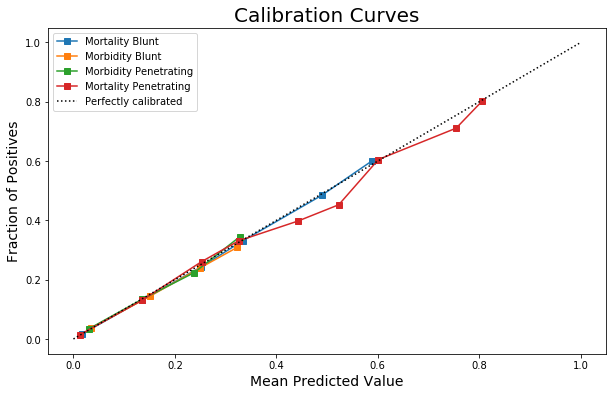

In [40]:
plt.figure(figsize=(10,6))
fop_mortal_penetrating, mpv_mortal_penetrating = calibration_curve(
    test_y_mortality_random_penetrating, 
    y_pred_proba_mortal_penetrating_test,
    n_bins=10,
)
fop_morbid_penetrating, mpv_morbid_penetrating = calibration_curve(
    test_y_morbidity_random_penetrating, 
    y_pred_proba_morbid_penetrating_test,
    n_bins=10,
)
fop_morbid_blunt, mpv_morbid_blunt = calibration_curve(
    test_y_morbidity_random_blunt, 
    y_pred_proba_morbid_blunt_test,
    n_bins=10,
)
fop_mortal_blunt, mpv_mortal_blunt = calibration_curve(
    test_y_mortality_random_blunt, 
    y_pred_proba_mortal_blunt_test,
    n_bins=10,
)
plt.plot(mpv_mortal_blunt, fop_mortal_blunt, "s-", label="Mortality Blunt")
plt.plot(mpv_morbid_blunt, fop_morbid_blunt, "s-", label="Morbidity Blunt")
plt.plot(mpv_morbid_penetrating, fop_morbid_penetrating, "s-", label="Morbidity Penetrating")
plt.plot(mpv_mortal_penetrating, fop_mortal_penetrating, "s-", label="Mortality Penetrating")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.ylabel("Fraction of Positives", fontsize=14)
plt.xlabel("Mean Predicted Value", fontsize=14)
plt.title("Calibration Curves", fontsize=20)
plt.legend()
plt.show()

# New AUCs with calibrated proba

In [44]:
# Nothing changes!
auc_mortal_penetrating = round(roc_auc_score(test_y_mortality_random_penetrating, 
    y_pred_proba_mortal_penetrating_test,),3)
print("AUC Mortal Penetrating", auc_mortal_penetrating)
auc_morbid_penetrating = round(roc_auc_score(test_y_morbidity_random_penetrating, 
    y_pred_proba_morbid_penetrating_test,),3)
print("AUC morbid Penetrating", auc_morbid_penetrating)
auc_mortal_blunt = round(roc_auc_score(test_y_mortality_random_blunt, 
    y_pred_proba_mortal_blunt_test,),3)
print("AUC Mortal blunt", auc_mortal_blunt)
auc_morbid_blunt = round(roc_auc_score(test_y_morbidity_random_blunt, 
    y_pred_proba_morbid_blunt_test,),3)
print("AUC morbid blunt", auc_morbid_blunt)

AUC Mortal Penetrating 0.941
AUC morbid Penetrating 0.777
AUC Mortal blunt 0.89
AUC morbid blunt 0.754
